In [78]:
import pandas as pd


def read_csv_file(file_path):
    """
    Reads a CSV file and returns a DataFrame.
    
    :param file_path: Path to the CSV file.
    :return: DataFrame containing the data from the CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None
    
train_df = read_csv_file('./data/train.csv')

test_df = read_csv_file('./data/test.csv')

## Exploratory Data Analysis (EDA) for Titanic Dataset

Get training data set information

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Get test data set information

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Describe Test Dataset

In [81]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe Test Dataset

In [82]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Bar Chart for Survival Count

<Axes: xlabel='Survived', ylabel='count'>

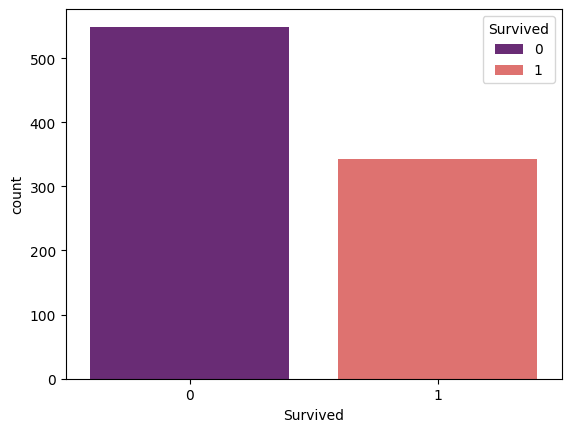

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# survival count plot
sns.countplot(x=train_df['Survived'], data=train_df, palette='magma', hue='Survived')

### Bar chart for Survival Count per Gender

<Axes: xlabel='Sex', ylabel='count'>

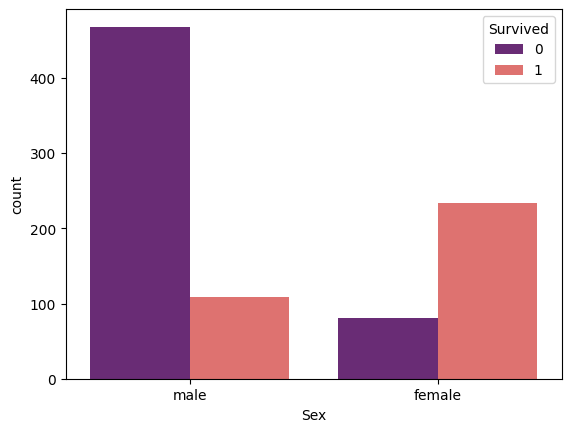

In [84]:
# sex count plot for survival
sns.countplot(x=train_df['Sex'], data=train_df, palette='magma', hue='Survived')

### Bar chart for Survival Count per Embarked

<Axes: xlabel='Embarked', ylabel='count'>

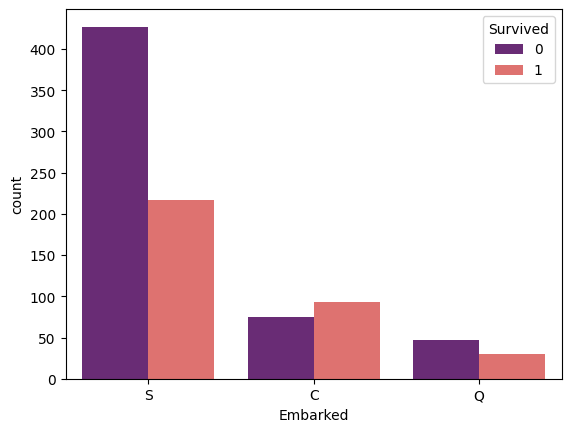

In [85]:
# embarked count plot for survival
sns.countplot(x=train_df['Embarked'], data=train_df, palette='magma', hue='Survived')

### Bar Chart for Survival Count per Passenger Class

<Axes: xlabel='Pclass', ylabel='count'>

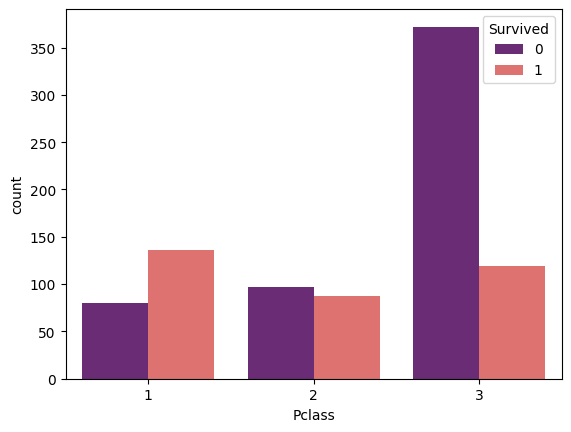

In [86]:
# passenger class count plot for survival
sns.countplot(x=train_df['Pclass'], data=train_df, palette='magma', hue='Survived')

In [87]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)

print("% of women who survived:", f"{rate_women * 100}%")

% of women who survived: 74.20382165605095%


In [88]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", f"{rate_men * 100}%")

% of men who survived: 18.890814558058924%


## Clean Data

- Replace missing values in the "Age" column with the mean age.

In [89]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].mean())

In [90]:
from sklearn.ensemble import RandomForestClassifier


y_train = train_df["Survived"]

features = ["Pclass", "SibSp", "Parch", "Sex", "Age"]

X_train = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=2000, random_state=42, max_depth=5)

model.fit(X_train, y_train)

y_predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_predictions})

output.to_csv('./results/titanic_submission.csv', index=False)

output.head()

X_train.head()

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male
0,3,1,0,22.0,False,True
1,1,1,0,38.0,True,False
2,3,0,0,26.0,True,False
3,1,1,0,35.0,True,False
4,3,0,0,35.0,False,True
